[0.78125 0.84375 0.65625 0.71875 0.625   0.71875 0.6875  0.78125 0.6875
 0.625   0.5625  0.53125 0.65625 0.625   0.59375 0.4375  0.6875  0.625
 0.59375 0.8125  0.71875 0.71875 0.78125 0.8125  0.6875  0.625   0.53125
 0.65625 0.53125 0.59375 0.59375 0.71875 0.65625 0.8125  0.5625  0.78125
 0.75    0.5     0.6875  0.625   0.5     0.78125 0.625   0.75    0.65625
 0.5     0.6875  0.65625 0.625   0.65625 0.625   0.6875  0.65625 0.5625
 0.6875  0.65625 0.53125 0.5625  0.65625 0.75    0.75    0.625   0.78125
 0.6875  0.71875 0.75    0.59375 0.53125 0.65625 0.625   0.8125  0.59375
 0.6875  0.65625 0.65625 0.75    0.8125  0.75    0.78125 0.6875  0.6875
 0.53125 0.6875  0.65625 0.6875  0.59375 0.625   0.625   0.65625 0.6875
 0.625   0.625   0.65625 0.75    0.6875  0.78125 0.6875  0.5625  0.59375
 0.5625  0.65625 0.5     0.71875 0.8125  0.6875  0.65625 0.78125 0.71875
 0.75    0.75    0.75    0.90625 0.625   0.6875  0.6875  0.625   0.6875
 0.59375 0.75    0.71875 0.75    0.65625 0.625   0.65625 0

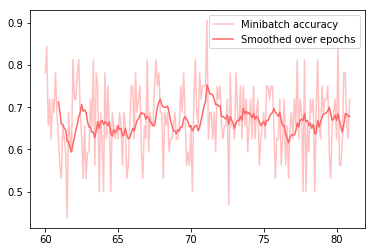

In [52]:
from matplotlib import pyplot as plt
import numpy as np

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

arr = np.load('D_accs.npy')
per_epoch=10
sampled = arr[np.arange(0, 21 * int(per_epoch)) * int(arr.shape[0]/(per_epoch * 21.))]
print(sampled)

window=per_epoch
salmon=[255./255.,102./255.,102./255.]
smoothed = moving_average(sampled, n=window)
raw, =plt.plot(np.arange(60, 81, (1./per_epoch)), sampled, color=salmon,alpha=0.4, label='Minibatch accuracy')
smoothed, =plt.plot(np.arange(60, 81, (1./per_epoch))[(window-1):], smoothed, color=salmon, label='Smoothed over epochs')
plt.grid('off')
plt.legend(handles=[raw,smoothed])
plt.show()
